# **Importação de bibliotecas**


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


# **Importação dos dados**

In [ ]:
# Carregar o arquivo de dados
df = pd.read_csv("/Data.csv", sep=",")


# **Primeiras Analises**

In [ ]:
# Verificar informações básicas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Visualizar as primeiras linhas do DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# Descrever estatísticas básicas do DataFrame
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Verificar os tipos de dados das colunas
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
# Verificar valores nulos em cada coluna
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# **Iniciando tratamento dos dados**

In [ ]:
# Remover linhas com valores nulos
df.dropna(axis=0, inplace=True)

## **Tratando os preços iguais a 0**

In [ ]:
# Dividir o DataFrame em duas partes: uma contendo registros com UnitPrice igual a zero e outra com UnitPrice diferente de zero
unic = df[df["UnitPrice"] == 0]
unic.reset_index(inplace=True)
unic.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
1,33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
2,40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
3,47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
4,47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom


In [ ]:
unic_ = df[df["UnitPrice"] != 0]

In [ ]:
# Mesclar as duas partes do DataFrame com base na coluna 'StockCode', mantendo apenas os registros únicos
resultado = pd.merge(unic, unic_, on='StockCode', how='left').drop(columns={"Description_x", "Quantity_x", "InvoiceDate_x", "CustomerID_x", "Country_x", "InvoiceNo_y", "Description_y", 'Quantity_y', 'InvoiceDate_y','CustomerID_y', 'Country_y' } )
resultado.head()

,index,InvoiceNo_x,StockCode,UnitPrice_x,UnitPrice_y
0,9302,537197,22841,0.0,7.95
1,9302,537197,22841,0.0,7.95
2,9302,537197,22841,0.0,7.95
3,9302,537197,22841,0.0,7.95
4,9302,537197,22841,0.0,7.95


In [ ]:
# Remover duplicatas do DataFrame resultante
semd = resultado.drop_duplicates()
# Obter índices únicos dos registros resultantes
inx2 = semd['index'].unique()
print(inx2)
semd.head()

[  9302  33576  40089  47068  47070  56674  86789 130188 139453 145208
 157042 187613 198383 279324 282912 285657 298054 314745 314746 314747
 314748 358655 361825 379913 395529 420404 436428 436597 436961 439361
 446125 446793 446794 454463 454464 479079 479546 480649 485985 502122]


,index,InvoiceNo_x,StockCode,UnitPrice_x,UnitPrice_y
0,9302,537197,22841,0.0,7.95
18,9302,537197,22841,0.0,6.95
169,9302,537197,22841,0.0,5.49
181,9302,537197,22841,0.0,15.79
209,33576,539263,22580,0.0,5.95


In [ ]:
# Criar uma lista para armazenar os valores correspondentes aos índices únicos
valores = []
for valor in inx2:
  valor_correspondente = resultado.loc[resultado["index"] == valor, 'UnitPrice_y'].values[0]
  valores.append(valor_correspondente)

In [ ]:
# Obter os índices das linhas onde UnitPrice é igual a zero
loc = df.loc[df['UnitPrice'] == 0].index
print(loc)

Index([  9302,  33576,  40089,  47068,  47070,  56674,  86789, 130188, 139453,
       145208, 157042, 187613, 198383, 279324, 282912, 285657, 298054, 314745,
       314746, 314747, 314748, 358655, 361825, 379913, 395529, 420404, 436428,
       436597, 436961, 439361, 446125, 446793, 446794, 454463, 454464, 479079,
       479546, 480649, 485985, 502122],
      dtype='int64')


In [ ]:
# Substituir os valores de UnitPrice nas linhas com UnitPrice igual a zero pelos valores correspondentes na lista 'valores'
for value in loc:
    for i in range(len(valores)):
        valor = valores[i]
        df.at[value, 'UnitPrice'] = valor

In [ ]:
# Verificando se ainda existem valores iguais a 0
df[df["UnitPrice"] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# Verificando se existem quantidades menores ou iguais a 0
df[df["Quantity"] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
# Verificar se há valores negativos na coluna 'Quantity' e substituí-los pelo valor absoluto
df[df["Quantity"] <= 0] = df[df["Quantity"] <= 0] * -1
# Substituir valores negativos na coluna 'CustomerID' pelo valor absoluto
df["CustomerID"] = df["CustomerID"].abs()
# Substituir valores negativos na coluna 'UnitPrice' pelo valor absoluto
df["UnitPrice"] = df["UnitPrice"].abs()

In [ ]:
# Remover duplicatas do DataFrame
df.drop_duplicates(inplace= True )

In [ ]:
# Verificando se ainda exitem duplicadas
df.duplicated().sum()

0

In [ ]:
# Converter as colunas 'Quantity' e 'CustomerID' para o tipo de dados inteiro
df = df.astype({"Quantity": "int", "CustomerID": "int"})

In [ ]:
# Extrair apenas a parte da data da coluna 'InvoiceDate' e converter para o formato de data
df['InvoiceDate'] = df['InvoiceDate'].str.split().str[0]

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y')

In [ ]:
df['InvoiceDate']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-09
541905   2011-12-09
541906   2011-12-09
541907   2011-12-09
541908   2011-12-09
Name: InvoiceDate, Length: 399811, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399811 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    399811 non-null  object        
 1   StockCode    399811 non-null  object        
 2   Description  399811 non-null  object        
 3   Quantity     399811 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    399811 non-null  float64       
 6   CustomerID   399811 non-null  int64         
 7   Country      399811 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 35.5+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,Mes
count,399802.000000,392728,399802.000000,399802.000000,399802.000000,392728.000000
mean,12.760619,2011-07-10 06:01:31.959829760,3.306247,15282.761680,22.289873,7.601938
min,1.000000,2010-12-01 00:00:00,0.010000,12347.000000,0.060000,1.000000
25%,2.000000,2011-04-07 00:00:00,1.250000,13941.000000,4.950000,5.000000
50%,6.000000,2011-07-31 00:00:00,1.950000,15148.000000,11.900000,8.000000
75%,12.000000,2011-10-20 00:00:00,3.750000,16788.000000,19.800000,11.000000
max,9360.000000,2011-12-09 00:00:00,4287.630000,18287.000000,38970.000000,12.000000
std,46.304827,NaN,25.030801,1713.875753,99.575058,3.415010


<Axes: >

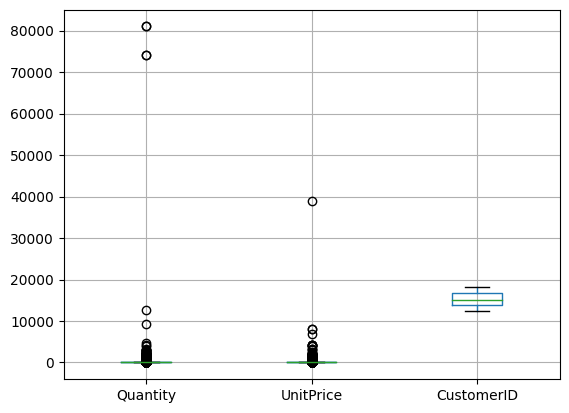

In [ ]:
# Analisando distribuição dos valores
df.boxplot()

In [ ]:
# Dropando os valores que são considerados outlier de acordo com o "gestor"
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] < 5000)]

In [ ]:
# Calcular o valor total de cada compra e adicionar como uma nova coluna 'Total'
df["Total"] = df["UnitPrice"] * df["Quantity"]

In [ ]:
# Checkando a nova coluna
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


# **Graficos**

## **Top 10 países com maior valor em vendas**

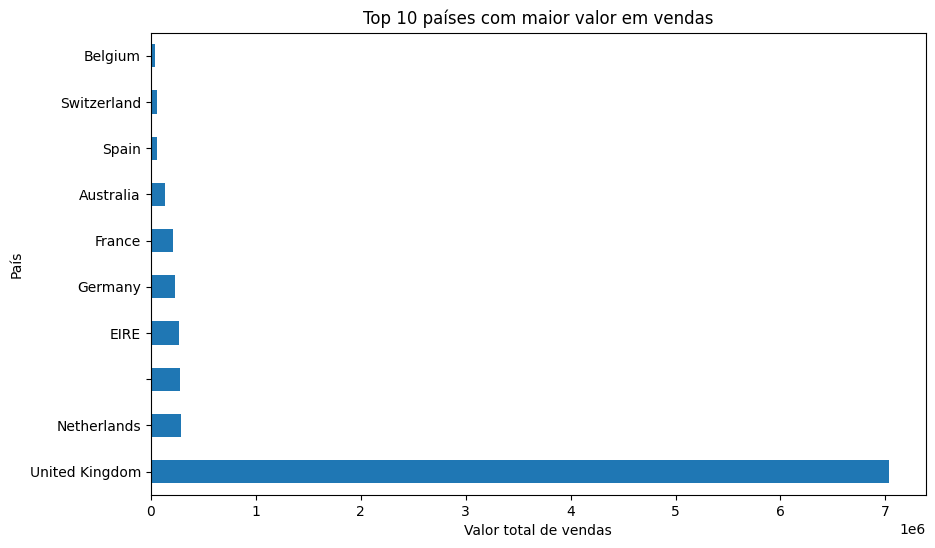

In [ ]:
top10_country = df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10)
top10_country.plot(figsize=(10, 6), kind="barh")
plt.ylabel('País')
plt.xlabel('Valor total de vendas')
plt.title('Top 10 países com maior valor em vendas')
plt.show;

## **Top 10 produtos mais vendidos**

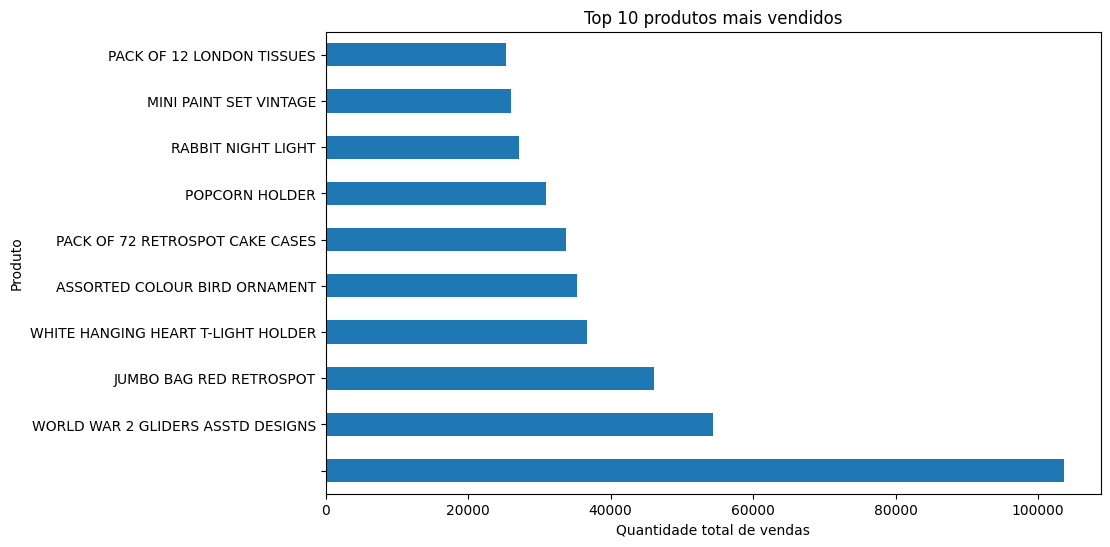

In [ ]:
top10_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top10_product.plot(figsize=(10, 6), kind="barh")
plt.ylabel('Produto')
plt.xlabel('Quantidade total de vendas')
plt.title('Top 10 produtos mais vendidos')
plt.show;

## **Valor de venda total por mês**

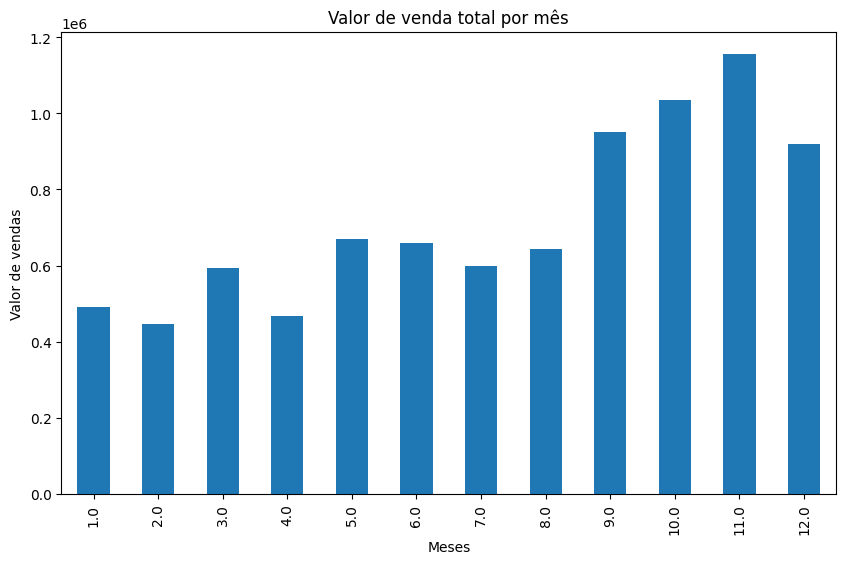

In [ ]:
top10_month = df.groupby(df['InvoiceDate'].dt.month)['Total'].sum()
top10_month.plot(figsize=(10, 6), kind="bar")
plt.ylabel('Valor de vendas')
plt.xlabel('Meses')
plt.title('Valor de venda total por mês')
plt.show;

## **Valor total de vendas por mês e por país (Top 10)**

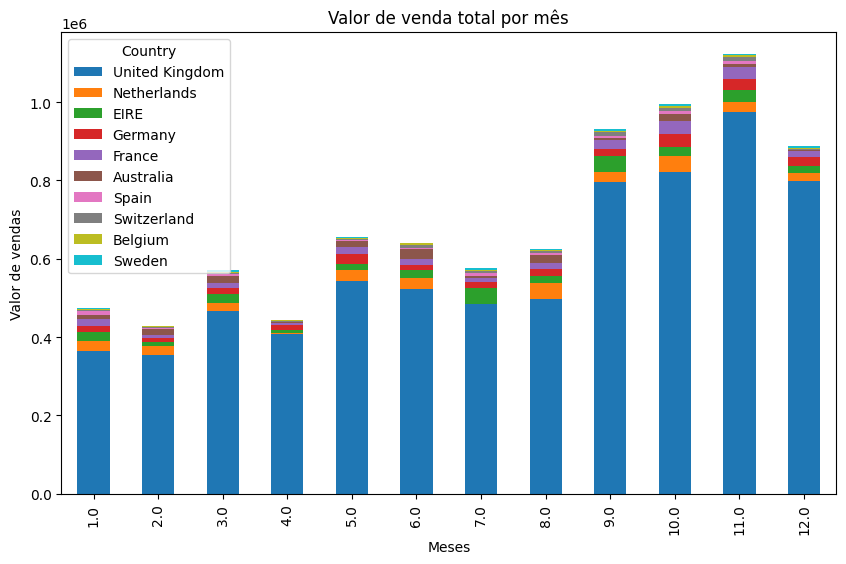

In [ ]:
vendas_por_mes_pais = df.groupby([df['InvoiceDate'].dt.month, 'Country'])['Total'].sum().unstack()
top_10_paises = vendas_por_mes_pais.sum().nlargest(10).index
vendas_por_mes_pais_top_10 = vendas_por_mes_pais[top_10_paises]

vendas_por_mes_pais_top_10.plot(figsize=(10, 6), kind="bar", stacked=True)
plt.ylabel('Valor de vendas')
plt.xlabel('Meses')
plt.title('Valor total de vendas por mês e por país (Top 10)')
plt.show;

# **Calculos Do RFM**

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,12.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,12.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,12.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,12.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,12.0


In [ ]:
# Calcular a data da última compra no dataset

ultima_data_compra = df['InvoiceDate'].max()

In [ ]:
# Agrupar os dados por cliente e número do pedido (InvoiceNo) e calcular a data máxima do pedido e o valor total do pedido

rfm_data = df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'max', 'Total': 'sum'})

In [ ]:

rfm_data

InvoiceDate    Total
CustomerID InvoiceNo                     
12347      537626     2010-12-07   711.79
           542237     2011-01-26   475.39
           549222     2011-04-07   636.25
           556201     2011-06-09   382.52
           562032     2011-08-02   584.91
...                          ...      ...
18283      579673     2011-11-30   220.31
           580872     2011-12-06   208.00
18287      554065     2011-05-22   765.28
           570715     2011-10-12  1001.32
           573167     2011-10-28    70.68

[20119 rows x 2 columns]

In [ ]:
# Calcular a recência para cada cliente, que é a diferença em dias entre a última compra do cliente e a última compra disponível no conjunto de dados

rfm_recencia = rfm_data.groupby('CustomerID')['InvoiceDate'].apply(lambda x: (ultima_data_compra - x.max()).days)
rfm_recencia

CustomerID
12347      2.0
12348     75.0
12349     18.0
12350    310.0
12352     36.0
         ...  
18280    277.0
18281    180.0
18282      7.0
18283      3.0
18287     42.0
Name: InvoiceDate, Length: 4370, dtype: float64

In [ ]:
# Calcular a frequência para cada cliente, que é o número total de compras feitas pelo cliente

rfm_frequencia = rfm_data.groupby('CustomerID').size()
rfm_frequencia

CustomerID
12347     7
12348     4
12349     1
12350     1
12352     9
         ..
18280     1
18281     1
18282     3
18283    16
18287     3
Length: 4370, dtype: int64

In [ ]:
# Calcular a monetaridade para cada cliente, que é a média dos valores totais de compra feitos pelo cliente

rfm_monetaridade = rfm_data.groupby('CustomerID')['Total'].mean()

In [ ]:
rfm_monetaridade

CustomerID
12347     615.714286
12348     449.310000
12349    1757.550000
12350     334.400000
12352     383.218889
            ...     
18280     180.600000
18281      80.820000
18282      59.833333
18283     127.845625
18287     612.426667
Name: Total, Length: 4370, dtype: float64

In [ ]:
# Criar um DataFrame contendo os resultados do RFM para cada cliente

rfm = pd.DataFrame({'Recencia': rfm_recencia, 'Frequencia': rfm_frequencia, 'Monetaridade': rfm_monetaridade})
rfm.head(10)

,Recencia,Frequencia,Monetaridade
CustomerID,,,
12347,2.0,7,615.714286
12348,75.0,4,449.310000
12349,18.0,1,1757.550000
12350,310.0,1,334.400000
12352,36.0,9,383.218889
12353,204.0,1,89.000000
12354,232.0,1,1079.400000
12355,214.0,1,459.400000
12356,22.0,3,937.143333


# **DataFrame com o RFM de cada cliente**

In [ ]:
rfm

,Recencia,Frequencia,Monetaridade
CustomerID,,,
12347,2.0,7,615.714286
12348,75.0,4,449.310000
12349,18.0,1,1757.550000
12350,310.0,1,334.400000
12352,36.0,9,383.218889
...,...,...,...
18280,277.0,1,180.600000
18281,180.0,1,80.820000
18282,7.0,3,59.833333
